In [289]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# *Basic SIR Model*

In [290]:
# S, I, R are different compartments of the *compartmental model*
# S(7) means how many people are (still) susceptible to the disease after 7 days
S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
y0 = S0, I0, R0 # Initial conditions vector
N = sum(y0) # total population

infection_chance = 0.2 
contacts_per_day = 5 # https://www.covid-19-mobility.org/de/reports/contacts-pandemic/
beta = infection_chance * contacts_per_day # number of people that are infected by one person each day
D = 4.0 # number of days an infected person has and can spread the disease
gamma = 1.0 / D # the proportion of infected recovering per day (γ = 1/D)
# shouldn't you track how many people were sick on day 1 and then let them recover after day 1+D?
total_infections_pp = round(beta / gamma, 1)
print(f"Total infections per person: {total_infections_pp}")

Total infections per person: 4.0


In [291]:
# some basic math reminder : dSdr describes the change of S
def deriv(y, t, N, beta, gamma):
    S, I, _R = y
    # these derivatives (ex.: S'(t)) describe the change of a function (...?)
    dSdt = -beta * I * (S / N)
    dIdt = beta * I * (S / N) - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [292]:
t = np.linspace(0, 49, 50) # Grid/array of time points (in days)
# just seems like a fancy way to do np.asarray(range(50))

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# structure of vector is 50 entries with values for S(t), I(t), R(t) each
print(len(ret))
print(ret[:50][7])

50
[803.47321499 142.07405431  54.45273071]


In [293]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show()

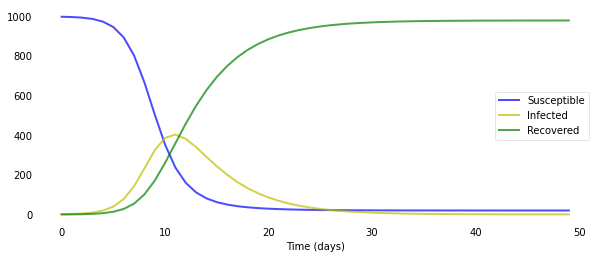

In [294]:
plotsir(t, S, I, R)

# *Addition of new compartment*

In [295]:
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [296]:
N = 1_000_000
S0, E0, I0, R0 = N-1, 1, 0, 0  # initial conditions: one exposed
D = 4.0 # infections lasts four days
gamma = 1.0 / D
delta = 1.0 / 5.0  # incubation period of five days
R_0 = 5.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma

In [297]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
print(ret.shape, type(ret.T))
S, E, I, R = ret.T
print(S)

(100, 4) <class 'numpy.ndarray'>
[999999.         999998.89005853 999998.59727041 999998.13995108
 999997.50283767 999996.64675771 999995.51087914 999994.01059849
 999992.03230217 999989.42527629 999985.99047409 999981.46544102
 999975.50432248 999967.65146526 999957.30661404 999943.67905757
 999925.72723009 999902.07916866 999870.92777479 999829.89291462
 999775.83990072 999704.64061066 999610.85922508 999487.33896964
 999324.65899182 999110.42109776 998828.31397992 998456.88713645
 997967.94722971 997324.46546572 996477.85530251 995364.44562493
 993900.93685358 991978.59037801 989455.87383103 986149.28259992
 981822.11138106 976171.1093741  968811.29992771 959259.90159186
 946921.41792344 931077.75475696 910889.80531825 885420.1953923
 853690.07515723 814784.09820578 768013.58242376 713133.68777357
 650583.07421017 581677.92929898 508664.02261391 434540.25974409
 362637.37291524 296049.06696973 237103.65869259 187059.81378837
 146103.1164169  113584.07320879  88360.24029282  69113.76

In [298]:
def plot_short(ax_plot, x, Y, colour: str, label:str, alpha_val=0.7, line_val=2):
    ax_plot.plot(x, Y, colour, label=label, alpha=alpha_val, linewidth=line_val)

In [299]:
def plotseird(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None, CFR=None):
  
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  # plot_short(ax, t, S, 'b', 'susceptible')
  # plot_short(ax, t, E, 'y', 'exposed')
  # plot_short(ax, t, I, 'r', 'infected')
  # plot_short(ax, t, R, 'g', 'recovered')
  if D is not None:
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    # plot_short(ax, t, D, 'k', 'dead')
    ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
    # plot_short(ax, t, S+E+I+R+D, 'c--', 'total')

  else:
    ax.plot(t, S+E+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')
    # plot_short(ax, t, S+E+I+R, 'c--', 'total')


  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  if L is not None:
      plt.title("Lockdown after {} days".format(L))
  plt.show();

  if R0 is not None or CFR is not None:
    f = plt.figure(figsize=(12,4))
  
  if R0 is not None:
    # sp1
    ax1 = f.add_subplot(121)
    ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

    ax1.set_xlabel('Time (days)')
    ax1.title.set_text('R_0 over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

  if Alpha is not None:
    # sp2
    ax2 = f.add_subplot(122)
    ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

    ax2.set_xlabel('Time (days)')
    ax2.title.set_text('fatality rate over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax2.yaxis.set_tick_params(length=0)
    ax2.xaxis.set_tick_params(length=0)
    ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

    plt.show();

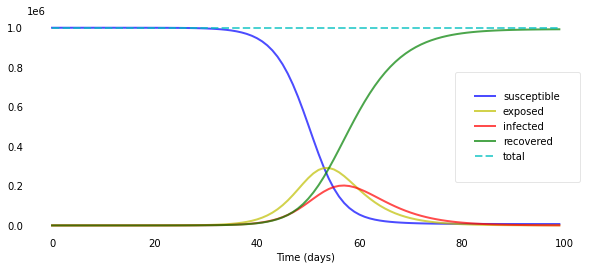

In [300]:
plotseird(t, S, E, I, R)